In [1]:
from qnet_context import qnetvo as qnet
from mac_context import multiple_access_channels as mac
import matplotlib.pyplot as plt

import numpy as np

from os import listdir
from os.path import isfile, join
import re

# Loading Data


In [2]:
def get_data_files(path, regex):
    """Retrieves all data files that match the ``regex`` in the
    directory specified by ``path``.
    """
    return [
        join(path, f)
        for f in listdir(path)
        if (f.endswith(".json") and isfile(join(path, f)) and bool(re.match(regex, f)))
    ]

def get_inequality_opt_dicts(path, resource_regex, game_names):

    opt_dicts = []
    for game_name in game_names:

        file_regex = resource_regex + "_facet_I_" + game_name + r"_\d\d\d\d-\d\d-\d\dT\d\d-\d\d-\d\dZ"    
        files = get_data_files(path, file_regex)
        opt_dicts += [[qnet.read_optimization_json(file) for file in files]]

    return opt_dicts

## Mac Data Analysis

In [12]:
int_data_path = "../data/interference_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

qint_facet_opt_dicts = get_inequality_opt_dicts(int_data_path, r"qint", game_names)
eatx_qint_facet_opt_dicts = get_inequality_opt_dicts(int_data_path, r"eatx_qint", game_names)
earx_qint_facet_opt_dicts = get_inequality_opt_dicts(int_data_path, r"earx_qint", game_names)

int2_data_path = "../data/interference2_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

qint2_facet_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"qint", game_names)
eatx_qint2_facet_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"eatx_qint", game_names)
earx_qint2_facet_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"earx_qint", game_names)

bf_data_path = "../data/butterfly_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

qbf_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"qint", game_names)
eatx_qbf_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"eatx_qint", game_names)
earx_qbf_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"earx_qint", game_names)




## Analyzing Data

In [13]:
interference_game_inequalities, interference_facet_inequalities, interference_game_names = mac.interference_network_bounds()
interference2_game_inequalities, interference2_facet_inequalities, interference2_game_names = mac.interference_network_bounds()
butterfly_game_inequalities, butterfly_facet_inequalities, butterfly_game_names = mac.butterfly_network_bounds()



def analyze_data(game_opt_dicts, inequalities):
    max_violations = []
    qbounds = []
    cbounds = []
    for i in range(len(game_opt_dicts)):
        print(game_names[i])

        opt_dicts = game_opt_dicts[i]
        inequality = inequalities[i]

        cbound = inequality[0]
        cbounds += [cbound]

        qbound = 0.0
        for x in range(9):
            qbound += max(inequality[1][:,x])
        qbounds += [qbound]

        max_violations += [(max([max(opt_dict["scores"]) for opt_dict in opt_dicts]) - cbound)]
        

    return max_violations, qbounds, cbounds

print(interference_game_names)
qint_facet_max_violations, qint_facet_qbounds, qint_facet_cbounds = analyze_data(qint_facet_opt_dicts, interference_facet_inequalities)
eatx_qint_facet_max_violations, eatx_qint_facet_qbounds, eatx_qint_facet_cbounds = analyze_data(eatx_qint_facet_opt_dicts, interference_facet_inequalities)
earx_qint_facet_max_violations, earx_qint_facet_qbounds, earx_qint_facet_cbounds = analyze_data(earx_qint_facet_opt_dicts, interference_facet_inequalities)

qint2_facet_max_violations, qint2_facet_qbounds, qint2_facet_cbounds = analyze_data(qint2_facet_opt_dicts, interference2_facet_inequalities)
eatx_qint2_facet_max_violations, eatx_qint2_facet_qbounds, eatx_qint2_facet_cbounds = analyze_data(eatx_qint2_facet_opt_dicts, interference2_facet_inequalities)
earx_qint2_facet_max_violations, earx_qint2_facet_qbounds, earx_qint2_facet_cbounds = analyze_data(earx_qint2_facet_opt_dicts, interference2_facet_inequalities)

qbf_facet_max_violations, qbf_facet_qbounds, qbf_facet_cbounds = analyze_data(qbf_facet_opt_dicts,  butterfly_facet_inequalities)
eatx_qbf_facet_max_violations, eatx_qbf_facet_qbounds, eatx_qbf_facet_cbounds = analyze_data(eatx_qbf_facet_opt_dicts,  butterfly_facet_inequalities)
earx_qbf_facet_max_violations, earx_qbf_facet_qbounds, earx_qbf_facet_cbounds = analyze_data(earx_qbf_facet_opt_dicts,  butterfly_facet_inequalities)

['mult0', 'mult1', 'swap', 'adder', 'compare', 'perm', 'diff', 'cv']


ValueError: max() arg is an empty sequence

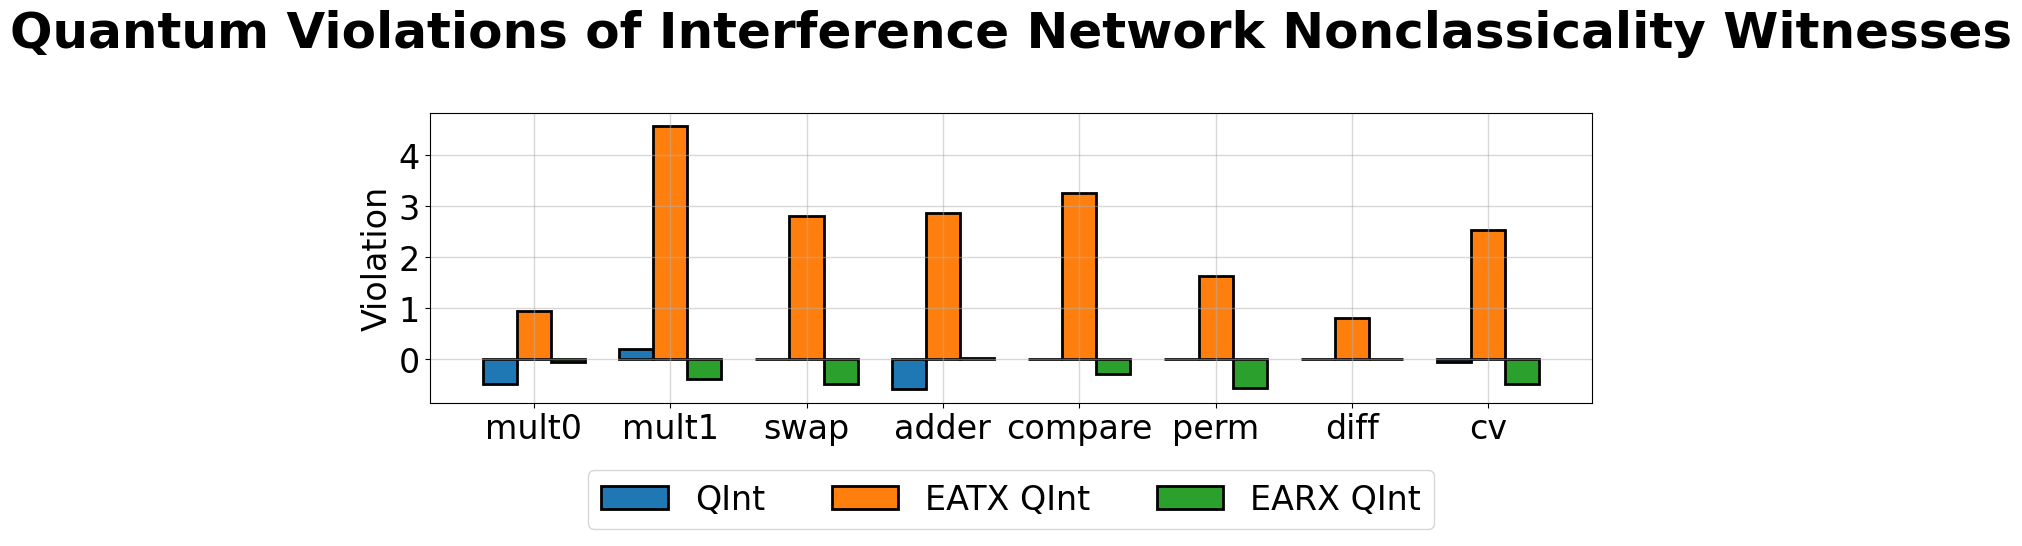

In [ ]:
x_axis = np.arange(len(interference_game_names))
x_labels = interference_game_names
width = 1/4

fig = plt.figure(figsize=(15, 5))
plt.grid(linewidth=1, alpha=0.5)



plt.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)
plt.bar(x_axis-0*width, eatx_qint_facet_max_violations, width=width, label="EATX QInt", edgecolor="black",linewidth=2)
plt.bar(x_axis+1*width, earx_qint_facet_max_violations, width=width, label="EARX QInt", edgecolor="black",linewidth=2)

# plt.bar(x_axis+0*width, qint_facet_qbounds, width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)



plt.xticks(x_axis, x_labels, fontsize=24)
plt.title("Quantum Violations of Interference Network Nonclassicality Witnesses\n", size=36, fontweight="bold")
plt.yticks(fontsize=24)
plt.ylabel("Violation", fontsize=24)
# plt.legend(fontsize=20, ncol=3)

plt.figlegend(loc="lower center", ncols = 6, fontsize=24)
plt.subplots_adjust(bottom=0.3)

plt.show()

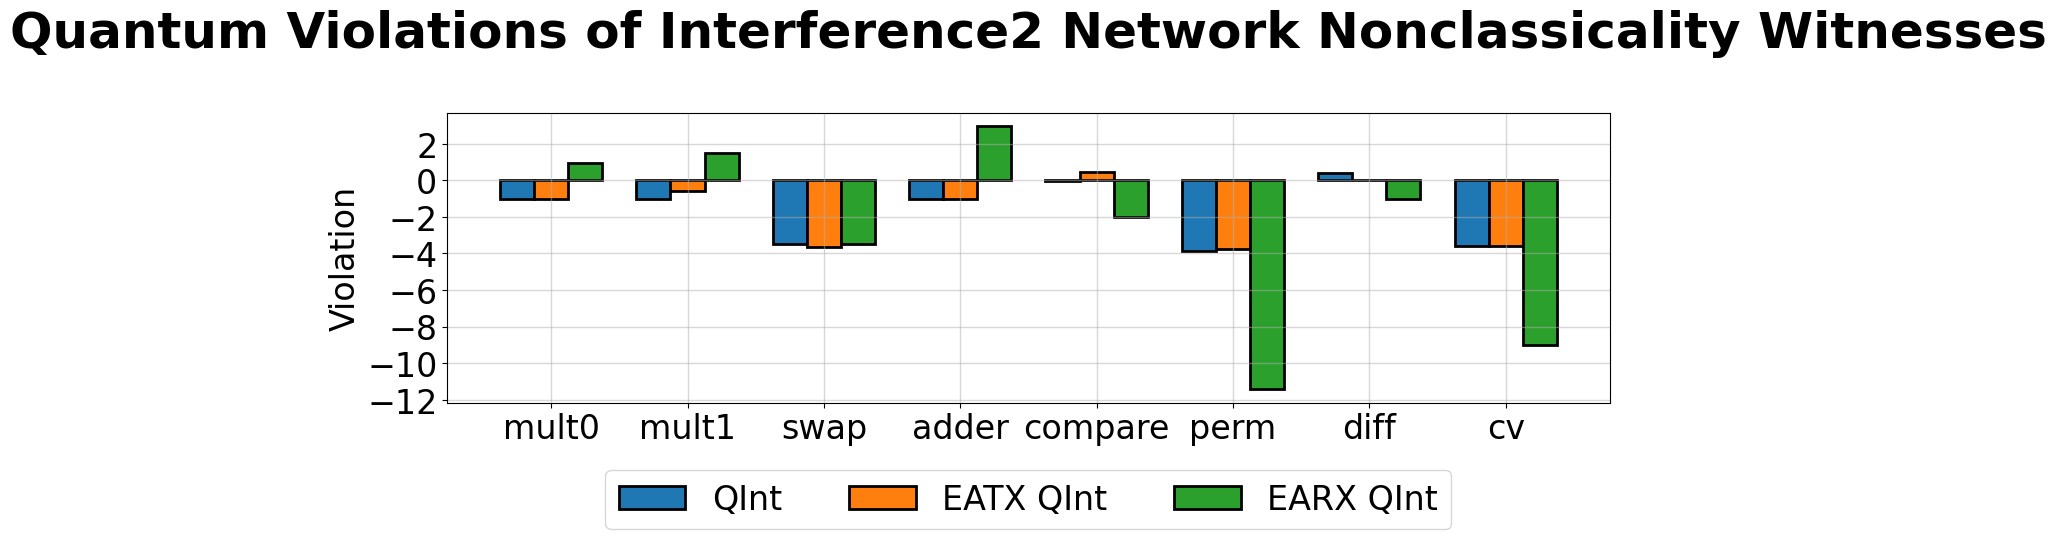

In [ ]:
x_axis = np.arange(len(interference2_game_names))
x_labels = interference2_game_names
width = 1/4

fig = plt.figure(figsize=(15, 5))
plt.grid(linewidth=1, alpha=0.5)



plt.bar(x_axis-1*width, qint2_facet_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)
plt.bar(x_axis-0*width, eatx_qint2_facet_max_violations, width=width, label="EATX QInt", edgecolor="black",linewidth=2)
plt.bar(x_axis+1*width, earx_qint2_facet_max_violations, width=width, label="EARX QInt", edgecolor="black",linewidth=2)

# plt.bar(x_axis+0*width, qint_facet_qbounds, width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)



plt.xticks(x_axis, x_labels, fontsize=24)
plt.title("Quantum Violations of Interference2 Network Nonclassicality Witnesses\n", size=36, fontweight="bold")
plt.yticks(fontsize=24)
plt.ylabel("Violation", fontsize=24)
# plt.legend(fontsize=20, ncol=3)

plt.figlegend(loc="lower center", ncols = 6, fontsize=24)
plt.subplots_adjust(bottom=0.3)

plt.show()

NameError: name 'qbf_facet_max_violations' is not defined

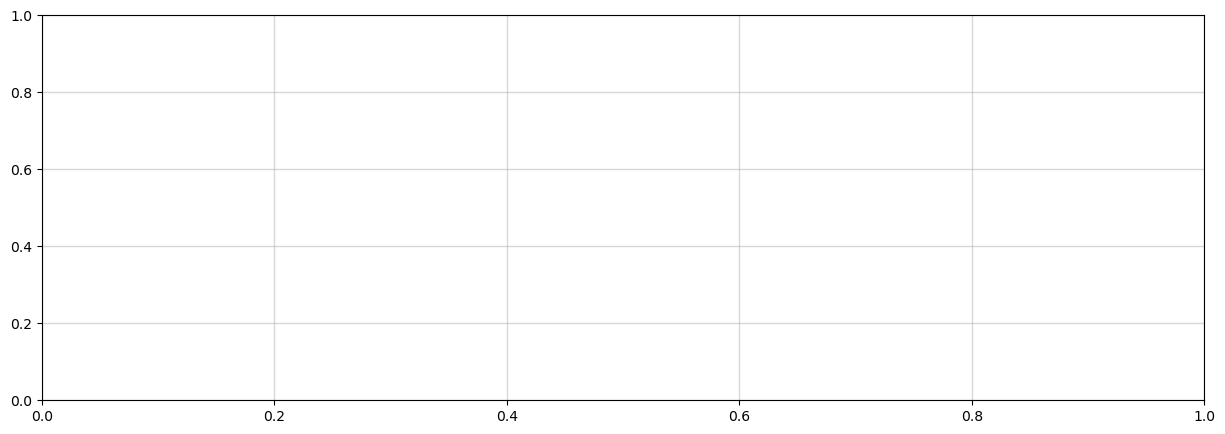

In [11]:
x_axis = np.arange(len(butterfly_game_names))
x_labels = butterfly_game_names
width = 1/4

fig = plt.figure(figsize=(15, 5))
plt.grid(linewidth=1, alpha=0.5)



plt.bar(x_axis-1*width, qbf_facet_max_violations, width=width, label="QBF", edgecolor="black",linewidth=2)
plt.bar(x_axis-0*width, eatx_qbf_facet_max_violations, width=width, label="EATX QBF", edgecolor="black",linewidth=2)
plt.bar(x_axis+1*width, earx_qbf_facet_max_violations, width=width, label="EARX QBF", edgecolor="black",linewidth=2)

# plt.bar(x_axis+0*width, qint_facet_qbounds, width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)



plt.xticks(x_axis, x_labels, fontsize=24)
plt.title("Quantum Violations of Butterfly Network Nonclassicality Witnesses\n", size=36, fontweight="bold")
plt.yticks(fontsize=24)
plt.ylabel("Violation", fontsize=24)
# plt.legend(fontsize=20, ncol=3)

plt.figlegend(loc="lower center", ncols = 6, fontsize=24)
plt.subplots_adjust(bottom=0.3)

plt.show()

NameError: name 'qmac_xor_max_violations' is not defined

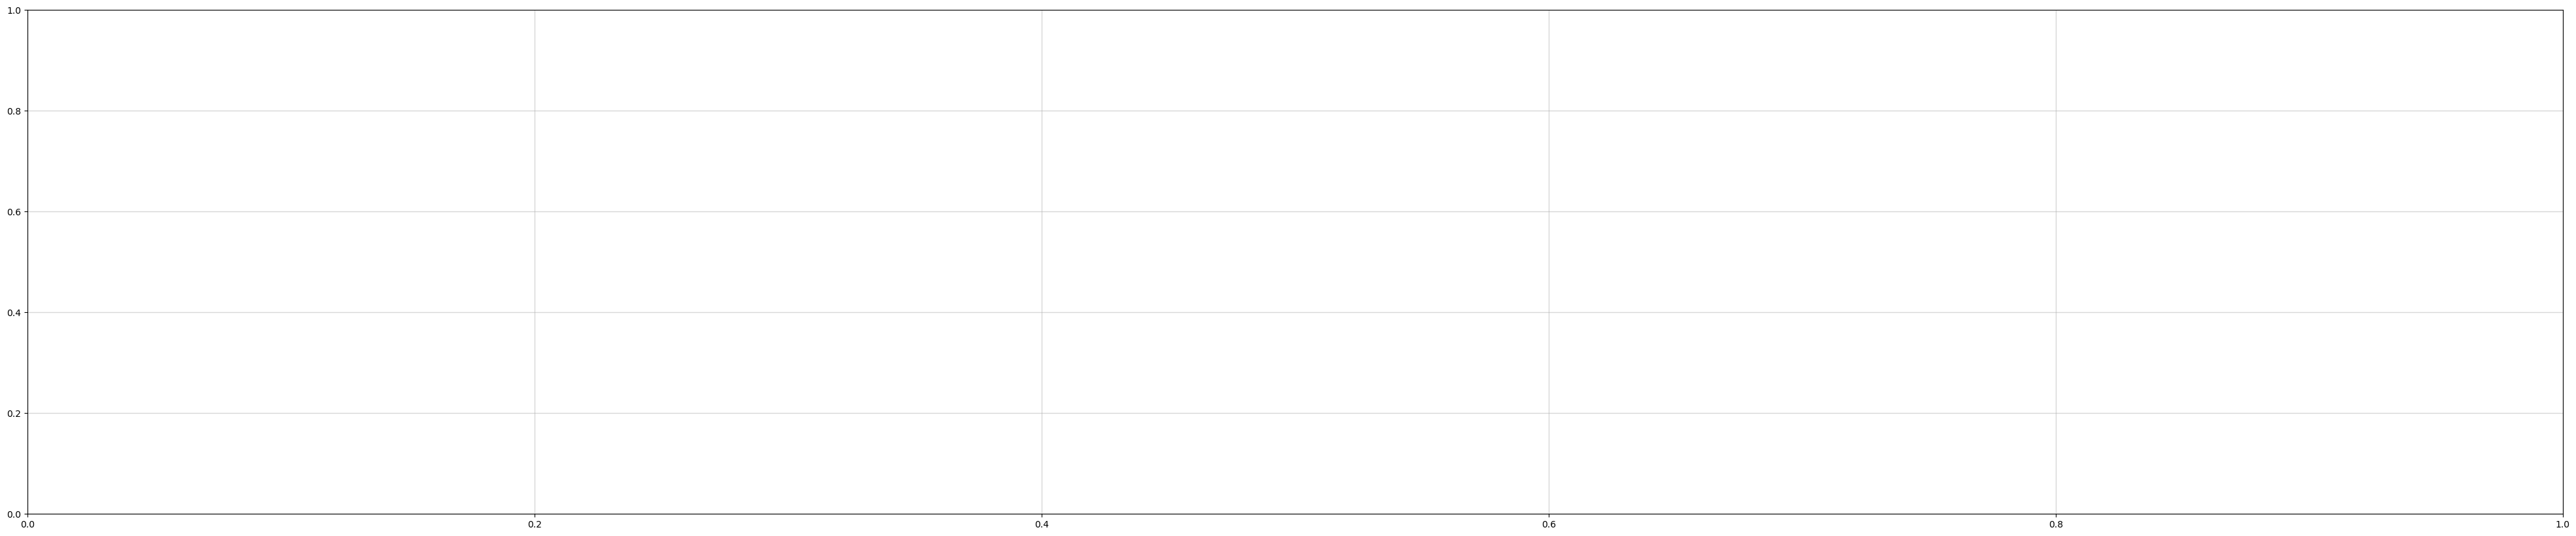

In [6]:
x_labels = [
    r"$\mathbf{G}_{FP}$", r"$\mathbf{G}_1$", r"$\mathbf{G}_2$",r"$\mathbf{G}_3$", r"$\mathbf{G}_4$", r"$\mathbf{G}_5$", r"$\mathbf{G}_6$", r"$\mathbf{G}_7$", r"$\mathbf{G}_8$", r"$\mathbf{G}_9$", r"$\mathbf{G}_{10}$",
    r"$\mathbf{G}_{11}$", r"$\mathbf{G}_{12}$",r"$\mathbf{G}_{13}$", r"$\mathbf{G}_{14}$", r"$\mathbf{G}_{15}$", r"$\mathbf{G}_{16}$", r"$\mathbf{G}_{17}$", r"$\mathbf{G}_{18}$", r"$\mathbf{G}_{19}$",
]

x_axis = np.arange(20)

width = 1/6

fig = plt.figure(figsize=(50, 10))
plt.grid(linewidth=1, alpha=0.5)


plt.bar(x_axis-2*width, qmac_xor_max_violations, width=width, label="QMAC", edgecolor="black",linewidth=2)
plt.bar(x_axis-1*width, ea_mac_xor_max_violations, width=width, label="EA  CMAC", edgecolor="black", linewidth=2)
plt.bar(x_axis+0*width, ea3_cmac_xor_max_violations, width=width, label="EA3 CMAC", edgecolor="black", linewidth=2)
plt.bar(x_axis+1*width, ea_qmac_xor_max_violations, width=width, label="EA QMAC", edgecolor="black", linewidth=2)

# plt.bar(x_axis+3*width, ghza_qmac_xor_max_violations, width=width, label="GHZA QMAC", edgecolor="black", linewidth=2)
# plt.bar(x_axis+4*width, ea_txrx_xor_max_violations, width=width, label="EA TxRx CMAC", edgecolor="black", linewidth=2)
plt.bar(x_axis+2*width, ea3_qmac_xor_max_violations, width=width, label="EA3 QMAC", edgecolor="black", linewidth=2)
# plt.bar(x_axis+6*width, ghza_cmac_xor_max_violations, width=width, label="GHZA CMAC", edgecolor="black", linewidth=2)
# plt.bar(x_axis+7*width, ghza_cmac_no_locc_xor_max_violations, width=width, label="GHZA CMAC No LOCC", edgecolor="black", linewidth=2)




# plt.bar(x_axis+1*width, quantum_bounds(), width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)
plt.bar(x_axis+0*width, np.ones(20), width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)





plt.xticks(x_axis, x_labels, fontsize=48)
plt.title("Quantum Violations of Multiaccess Network Nonclassicality Witnesses\n", size=54, fontweight="bold")
plt.yticks(fontsize=36)
plt.ylabel("Scaled Violation", fontsize=48)
# plt.legend(fontsize=20, ncol=3)

plt.figlegend(loc="lower center", ncols = 6, fontsize=36)
plt.subplots_adjust(bottom=0.3)

plt.show()

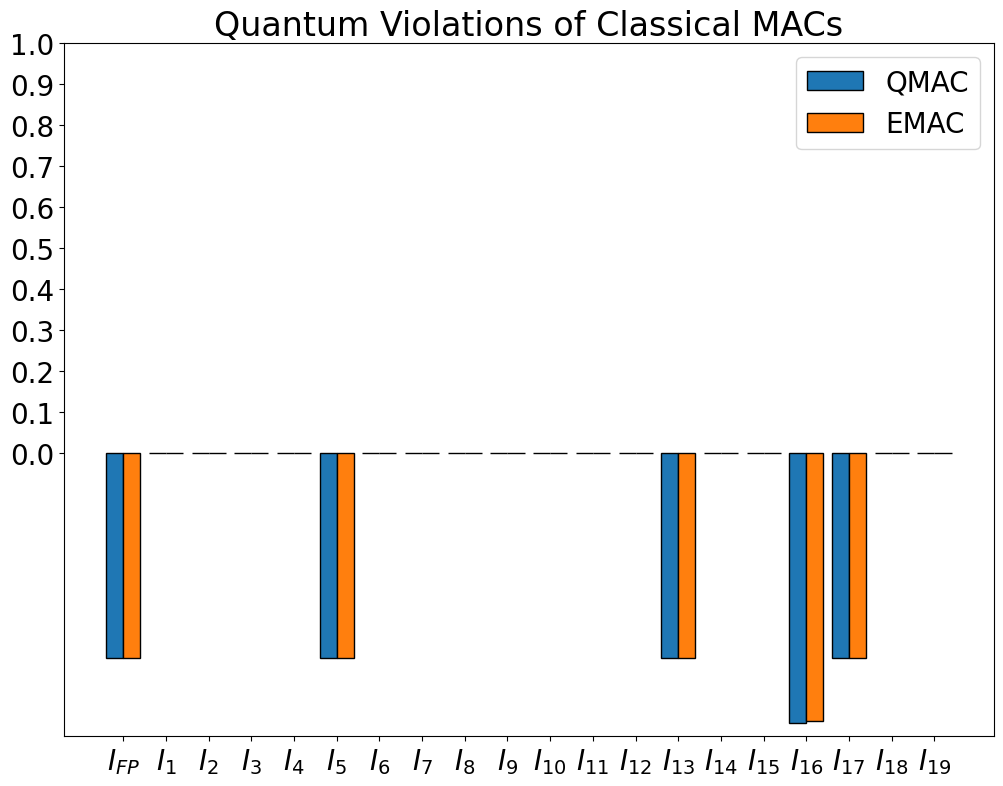

In [31]:
x_labels = [
    r"$I_{FP}$", r"$I_1$", r"$I_2$",r"$I_3$", r"$I_4$", r"$I_5$", r"$I_6$", r"$I_7$", r"$I_8$", r"$I_9$", r"$I_{10}$",
    r"$I_{11}$", r"$I_{12}$",r"$I_{13}$", r"$I_{14}$", r"$I_{15}$", r"$I_{16}$", r"$I_{17}$", r"$I_{18}$", r"$I_{19}$",
]

x_axis = np.arange(20)

plt.figure(figsize=(12, 9))

plt.bar(x_axis-0.2, qmac_and_max_violations, width=0.4, label="QMAC", edgecolor="black")
plt.bar(x_axis+0.2, ea_mac_and_max_violations, width=0.4, label="EMAC", edgecolor="black")

plt.xticks(x_axis, x_labels, fontsize=20)
plt.title("Quantum Violations of Classical MACs", size=24)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],fontsize=20)
plt.legend(fontsize=20)

plt.show()

## Sig Dim Data Analysis

In [125]:
data_path = "../data/qubit_signaling_dimension/"

eacc_ry_encoder_opt_dicts = get_sig_dim_opt_dicts(data_path, r"^(eacc_ry_encoder_|ghzacc_ry_encoder_)")
# eacc_ghz_ry_arb_opt_dicts = get_sig_dim_opt_dicts(data_path, r"^ghzacc_ry_encoder_")
eaqc_arb_encoder_opt_dicts = get_sig_dim_opt_dicts(data_path, r"^(eaqc_arb_|eaqc_ghz_arb_arb_|eaqc_ghz_arb_arb_)")
# eaqc_ghz_arb_arb_opt_dicts = get_sig_dim_opt_dicts(data_path, r"^eaqc_ghz_arb_arb_")
# eaqc_ghz_ryrz_arb_opt_dicts = get_sig_dim_opt_dicts(data_path, r"^eaqc_ghz_arb_arb_")

In [126]:
def analyze_sig_dim_data(inequality_opt_dicts):
    sig_dim_inequalities = mac.qubit_signaling_dimension_bounds()
    classical_bounds = [inequality_tuple[0] for inequality_tuple in sig_dim_inequalities]
    game_bounds = game_sig_dim_max_violations()


    max_violations = []
    for i in range(len(sig_dim_inequalities)):
        max_violations += [
            (max([max(opt_dict["scores"]) for opt_dict in inequality_opt_dicts[i]]) - classical_bounds[i])  / game_bounds[i]
        ]

    return max_violations

def game_sig_dim_max_violations():
    sig_dim_inequalities = mac.qubit_signaling_dimension_bounds()
    classical_bounds = [inequality_tuple[0] for inequality_tuple in sig_dim_inequalities]
    game_max_bounds = [sum([np.max(inequality[1][:,x]) for x in range(inequality[1].shape[1])]) for inequality in sig_dim_inequalities]

    return [
        game_max_bounds[i] - classical_bounds[i]
        for i in range(len(sig_dim_inequalities))
    ]

# def game_sig_dim_white_noise_scores():
#     sig_dim_inequalities = mac.qubit_signaling_dimension_bounds()
#     classical_bounds = [inequality_tuple[0] for inequality_tuple in sig_dim_inequalities]
#     game_min_scores = [sum([np.sum(inequality[1][:,x]) for x in range(inequality[1].shape[1])])/inequality.shape[0] for inequality in sig_dim_inequalities]

#     return [
#         game_max_bounds[i] - classical_bounds[i]
#         for i in range(len(sig_dim_inequalities))
#     ]


game_bounds = game_sig_dim_max_violations()


eacc_ry_encoder_max_violations = analyze_sig_dim_data(eacc_ry_encoder_opt_dicts)
# eacc_ghz_ry_arb_max_violations = analyze_sig_dim_data(eacc_ghz_ry_arb_opt_dicts)
eaqc_arb_encoder_max_violations = analyze_sig_dim_data(eaqc_arb_encoder_opt_dicts)
# eaqc_ghz_arb_arb_max_violations = analyze_sig_dim_data(eaqc_ghz_arb_arb_opt_dicts)
# eaqc_ghz_ryrz_arb_max_violations = analyze_sig_dim_data(eaqc_ghz_ryrz_arb_opt_dicts)

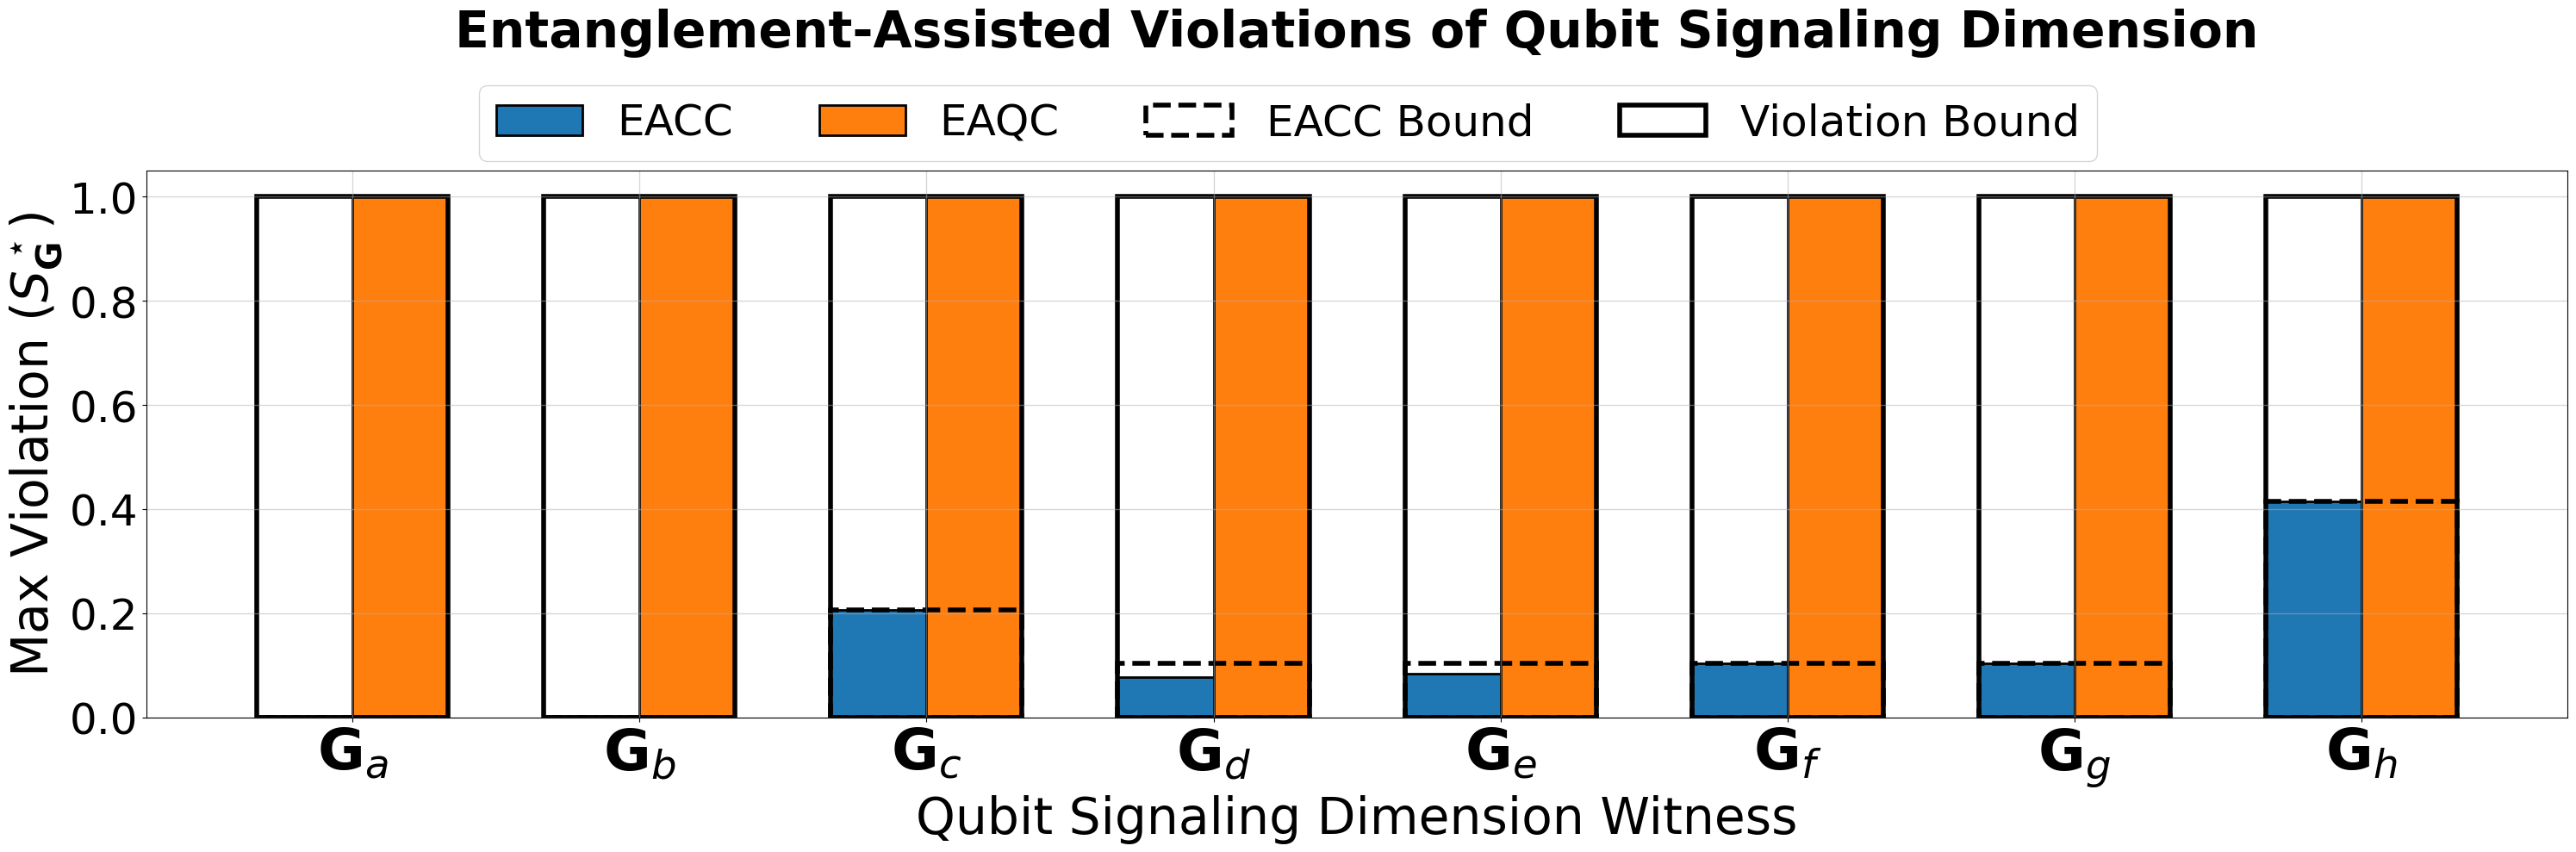

In [132]:
x_labels = [
    r"$\mathbf{G}_{a}$", r"$\mathbf{G}_b$", r"$\mathbf{G}_c$",r"$\mathbf{G}_d$", r"$\mathbf{G}_e$", r"$\mathbf{G}_f$", r"$\mathbf{G}_g$", r"$\mathbf{G}_h$",
]

x_axis = np.arange(8)

width = 1/3

fig = plt.figure(figsize=(30, 10))
plt.grid(linewidth=1, alpha=0.5)


plt.bar(x_axis-0.5*width, eacc_ry_encoder_max_violations, width=width, label="EACC", edgecolor="black",linewidth=2)
plt.bar(x_axis+0.5*width, eaqc_arb_encoder_max_violations, width=width, label="EAQC", edgecolor="black", linewidth=2)



# plt.bar(x_axis+1*width, eacc_ghz_ry_arb_max_violations, width=width, label="EACC GHZ State", edgecolor="black", linewidth=2)
# plt.bar(x_axis+2*width, eaqc_arb_encoder_max_violations, width=width, label="EAQC Arb State", edgecolor="black", linewidth=2)
# plt.bar(x_axis+3*width, eaqc_ghz_arb_arb_max_violations, width=width, label="EAQC GHZ Arb Arb", edgecolor="black", linewidth=2)
# plt.bar(x_axis+4*width, eaqc_ghz_ryrz_arb_max_violations, width=width, label="EAQC GHZ RYRZ Arb", edgecolor="black", linewidth=2)





eacc_max_bounds = [0,0,
    ((5 + np.sqrt(2))/2 - 3),
    ((7 + np.sqrt(2))/2 - 4)/2,
    ((7 + np.sqrt(2))/2 - 4)/2,
    ((7 + np.sqrt(2))/2 - 4)/2,
    ((7 + np.sqrt(2))/2 - 4)/2,
    ((4 + np.sqrt(2)) - 5)
]
plt.bar(x_axis+0*width, eacc_max_bounds, width=1-width,  label="EACC Bound", edgecolor="black", linewidth=4, fill=False, linestyle="--")
plt.bar(x_axis+0*width, np.ones(8), width=1-width,  label="Violation Bound", edgecolor="black", linewidth=4, fill=False)


plt.xticks(x_axis, x_labels, fontsize=48)
plt.title("Entanglement-Assisted Violations of Qubit Signaling Dimension\n\n", size=42, fontweight="bold")
plt.yticks(fontsize=36)
fig.legend(fontsize=36, ncol=4, loc="upper center", bbox_to_anchor=(0.5,0.92))
plt.ylabel(r"Max Violation ($S^\star_{\mathbf{G}}$)", fontsize=42)
plt.xlabel("Qubit Signaling Dimension Witness", fontsize=42)

fig.tight_layout()


plt.show()

In [128]:
eacc_ghz_ry_arb_opt_dicts

[[{'datetime': '2023-05-14T22:38:03Z',
   'opt_score': 1.9999999999999853,
   'opt_settings': [3.141592653589793,
    2.966968151771058e-15,
    0.0,
    -0.8800017125377649,
    0.0,
    2.261590660236267,
    0.42844089227607274,
    1.1293558104420622,
    0.7126752747402366,
    2.672302485031191,
    0.46072538470714647,
    2.7207593638764798,
    2.659774070639009,
    0.1598264411317818,
    -2.861310085912988,
    0.0522252925801434,
    -1.1618420699357204,
    1.5419086594356581,
    -1.2299291605217193,
    1.1577207942081627,
    -0.032287493704026206,
    0.01719112250670726,
    -2.715765589053675,
    -2.635616577147959,
    -2.9997928685367996,
    2.9024422216072294e-16,
    2.9308951336635602,
    -0.28387256806848776,
    1.570796310033833,
    0.48049452787897456,
    -1.570796329834355,
    2.1660247324017554,
    1.1925844119399822,
    3.1415926377072827,
    -0.6045783542075974,
    -1.4024962502807297],
   'scores': [0.9852134507516268,
    1.2310668945683079,

In [52]:
[1,2,3,4] / [4,5,6,7]

TypeError: unsupported operand type(s) for /: 'list' and 'list'